In [1]:
#recalling packages from library
library(twitteR)
 library(ROAuth)
 library(RCurl)
library(tm)
library(httr)
library(curl)
library(SnowballC)
library(wordcloud)
library(reshape)
library(ggplot2)
library(dplyr)
library(tidytext)

Loading required package: bitops
Loading required package: NLP

Attaching package: ‘httr’

The following object is masked from ‘package:NLP’:

    content


Attaching package: ‘curl’

The following object is masked from ‘package:httr’:

    handle_reset

Loading required package: RColorBrewer

Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate


Attaching package: ‘dplyr’

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:twitteR’:

    id, location

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
#setting working directory

setwd("~/desktop/GitHub/twitter1")

In [4]:
#setting API connection 
#api_key <- ""
#api_secret <-""
#access_token <- ""
#access_token_secret <-""

In [5]:
#setup_twitter_oauth(api_key,api_secret,access_token, access_token_secret)

In [6]:
 #tweets <- searchTwitter('#RafaleVerdict', n=1500, lang="en", since=NULL, until=NULL, retryOnRateLimit=10)

In [7]:
#saveRDS(tweets,"tweets.rds")

In [8]:
tweets<-readRDS("tweets.rds")

In [9]:
tweets.df <- twListToDF(tweets)

In [10]:
a<-tweets.df$text

In [11]:
#To remove non-ASCII Characters

aas<- unlist(strsplit(a, split=", "))
nonAscIDX<- grep("aas", iconv(aas, "latin1", "ASCII", sub="aas"))
aa<- aas[ - nonAscIDX]

In [12]:
myCorpus<-Corpus(VectorSource(aa))

In [13]:
# to remove special characters and convert to lowercase 
toSpace <- content_transformer(function(x, pattern) {return (gsub(pattern," ",
 x))})

 myCorpus<- tm_map(myCorpus,toSpace,"[^[:graph:]]")
myCorpus<-tm_map(myCorpus,toSpace,"/")

myCorpus<-tm_map(myCorpus,toSpace,"@")

myCorpus<-tm_map(myCorpus,toSpace,"\\|")

 myCorpus <- tm_map(myCorpus, content_transformer(tolower))

Warning message in tm_map.SimpleCorpus(myCorpus, toSpace, "[^[:graph:]]"):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, toSpace, "/"):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, toSpace, "@"):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, toSpace, "\\|"):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(myCorpus, content_transformer(tolower)):
“transformation drops documents”

In [14]:
#To remove punctuation 

myCorpus <- tm_map(myCorpus, removePunctuation)

Warning message in tm_map.SimpleCorpus(myCorpus, removePunctuation):
“transformation drops documents”

In [15]:
#To remove numbers 

myCorpus <- tm_map(myCorpus, removeNumbers)

Warning message in tm_map.SimpleCorpus(myCorpus, removeNumbers):
“transformation drops documents”

In [16]:
# to remove URL 

removeURL <- function(x) gsub("http[[:alnum:]]*", "", x)
myCorpus <- tm_map(myCorpus, content_transformer(removeURL))

Warning message in tm_map.SimpleCorpus(myCorpus, content_transformer(removeURL)):
“transformation drops documents”

In [23]:
#To remove stopwords and certain other words 
mystopwords<-c(stopwords("english"),"rafaleverdict","sirjadega")
myCorpus <- tm_map(myCorpus, removeWords, mystopwords)

Warning message in tm_map.SimpleCorpus(myCorpus, removeWords, mystopwords):
“transformation drops documents”

In [24]:
# To stem document 
myCorpus <- tm_map(myCorpus, stemDocument)

Warning message in tm_map.SimpleCorpus(myCorpus, stemDocument):
“transformation drops documents”

In [25]:
# To strip white space 
myCorpus <- tm_map(myCorpus, stripWhitespace)

Warning message in tm_map.SimpleCorpus(myCorpus, stripWhitespace):
“transformation drops documents”

In [26]:
# to convert to matrix 
dtm<-DocumentTermMatrix(myCorpus)
m<-as.matrix(dtm)
n<-m[ !rowSums(m[,colnames(m)[(3:ncol(m))]]==0)==ncol(m)-2, ]

In [27]:
# to find out frequent words 

findFreqTerms(dtm,lowfreq=10)

[1] "aviat"            "cheaper"          "dassault"         "dear"            
 [5] "hal"              "manufactur"       "rafal"            "rahulgandhi"     
 [9] "readi"            "sirjadeja"        "ask"              "bjp"             
[13] "now"              "rahulroushan"     "said"             "scam"            
[17] "lie"              "compar"           "cost"             "court"           
[21] "gone"             "iga"              "itemwi"           "nsitharamanoffc" 
[25] "origin"           "rfp"              "suprem"           "govt"            
[29] "tco"              "cag"              "report"           "lord"            
[33] "mohitjnu"         "object"           "yduivsz"          "chit"            
[37] "clean"            "acwwkoza"         "misfir"           "nawabmalikncp"   
[41] "pac"              "congress"         "bharattrustsmodi" "lillymarypinto"  
[45] "amp"              "bust"             "spkvrya"          "spread"          
[49] "just"             "mrsgandhi"        "lift"             "atheistkrishna"  
[53] "nkfrefrkc"        "head"             "kharg"

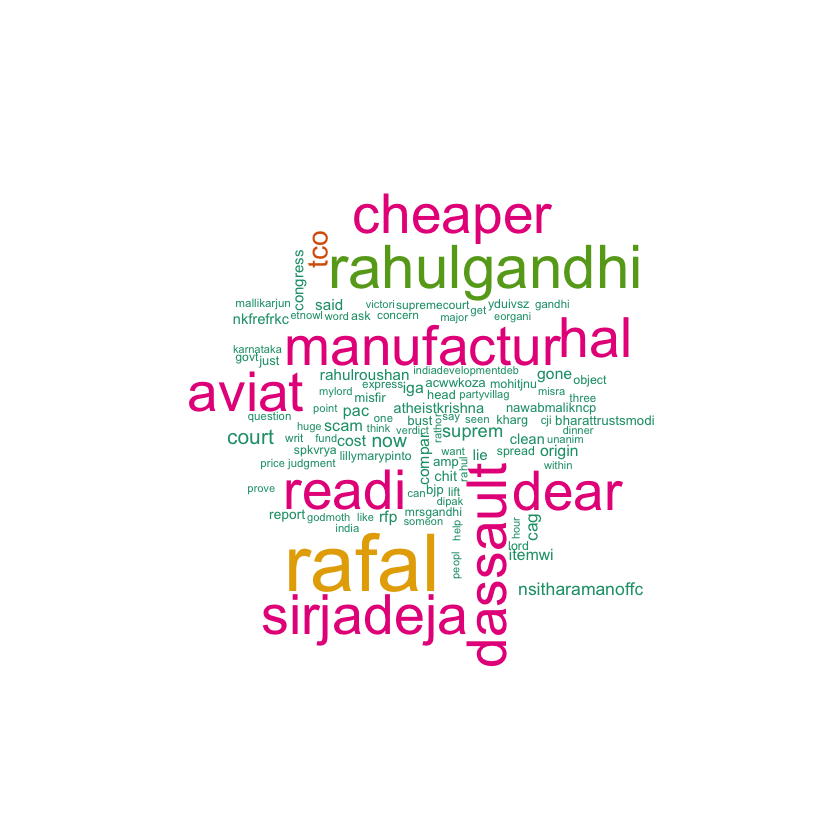

In [28]:
# for drawing word cloud 


set.seed(123)
freq <- sort(colSums(as.matrix(dtm)), decreasing=TRUE)
wordcloud(names(freq), freq, min.freq=5, colors=brewer.pal(6, "Dark2"))

In [30]:
# For sensitivity analysis 

hu.liu.pos<-scan('p.txt',what='character')

hu.liu.neg<-scan('n.txt',what='character')

In [31]:
score.sentiment = function(sentences, pos.words, neg.words, .progress='none')
  {
    require(plyr);
    require(stringr);
    scores = laply(sentences, function(sentence, pos.words, neg.words) {
      sentence = gsub('[^A-z ]','', sentence)
      sentence = tolower(sentence);
      word.list = str_split(sentence, '\\s+');
      words = unlist(word.list);
      pos.matches = match(words, pos.words);
      neg.matches = match(words, neg.words);
      pos.matches = !is.na(pos.matches);
      neg.matches = !is.na(neg.matches);
      score = sum(pos.matches) - sum(neg.matches);
      return(score);
    }, pos.words, neg.words, .progress=.progress );
    scores.df = data.frame(score=scores, text=sentences);
    return(scores.df);
  }

In [32]:
result<-score.sentiment(tweets.df$text,hu.liu.pos,hu.liu.neg)
  
  result$score

Loading required package: plyr
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:reshape’:

    rename, round_any

The following object is masked from ‘package:twitteR’:

    id

Loading required package: stringr


[1]  1  1  0  1  2  1  1  1  2  0  0  2  1  1  2  1  1 -1  1  1  1  1 -1  1
  [25] -1  1  1  1  1  1  0  1  2  1  0  1  0  1  2  1  2  2  1  1  1  1  1 -1
  [49]  1  2 -1 -1  1  1  1  1  1 -1  0 -1 -1  1  2  2  2  1  1  0 -1  1  1  1
  [73]  2  1 -2 -2  1  0  2  1  0 -1  1  0  1  0  1 -2  2  2  2  1 -2 -1  0  2
  [97] -2  2  1  1 -1  1  1  1  0  0  1  0  2 -1  1  0  0  2  2  1  2  2 -1  0
 [121]  2  1  2 -2  2 -1  2 -1  2  1  1 -2  1  1  1  1  1  1 -1  0  1  1  0  1
 [145]  1  0 -1  1  1  1  1  1 -1  1 -1  0  2  1  1 -1  2  0  2  0  0  0  1  2
 [169]  1  2  1 -2  1 -1  2  1  0  1 -2  0 -1  1  1 -1  1 -4  1  1  1  1 -1  1
 [193]  1  2  1  1  1  2  0 -1  0 -1  1  1 -1  1  2  1  0  2  1  2  2  2  0  1
 [217]  1  1  0 -1  2  1  1  1  0  1  2 -2  1  0  0  1  0  1  1 -1  1 -2  1  0
 [241]  2  1  2  1  1  2  3  1  0 -2  1  1  2  2 -2  1  2 -4  2  0  1  1  1  0
 [265]  0  0  1  1 -1  1 -1  1  1  1  0  1  1  1  1  2  1 -2  1  0 -1  0  1  1
 [289]  1  0  1  1  0  1  1  2  1  0  1  0  1  1  1  2  1 -1  1  0 -1  2  1  1
 [313]  0  1  1  1 -1  1  0  1  1  0  1  0  1  0  0  1  0 -3 -1  2  0  2  0  1
 [337]  1  1  1  0  1  1  1 -1  1 -2  1  1  1  1  1  2  1  2  1  1  1  2 -1  1
 [361] -1  0  1  1  2  2  1  1 -1  1  2  0 -2  1  2  1  2  0  1  1  2  1 -3  1
 [385]  0  2  0  0  1  0  1 -2  0  0  0  1 -1 -1  1 -1  0  1  0  1  1  1  1  0
 [409]  1  1  2  1  2  1  1  1  1  0  2  0  1  1  1  2  1  0  0  2  0  1  1  2
 [433]  1 -2  0  1  2  2  1  2  2  1  0 -1  0  1  2  2  1 -2  1  0  1  1  1  1
 [457] -1  2  1  1  1  1  2  1  0  1  1  1  0  2  1 -1 -2  1  1  0  1  2  1  2
 [481]  1  1  1  1 -1 -2  1  0  1  1  1  1  1  3  2  1  1  1  2 -1  1  1  1  1
 [505]  1  0  0  2 -2  1  2  2  2  1 -2  2  1  0  1  0  2  1  1  2  0  1  0  1
 [529]  1  1  0  2  2 -3  1  1  0  2  1  1  2  1  0  1  2 -1  1  1 -1  0  1  1
 [553]  1 -1  1 -1  1  1  0  2 -1  1  2  0  1  1  1 -1  1  1  1 -1  0  2  0  0
 [577] -3  0  0  1  0  1  0  0  0  2 -2  0 -1  0  1 -2  0  1  1  1 -2  0  2  2
 [601]  1  1  2  3  0  0  0  1  1  1  1  0  1  0  1  0 -2  1  1  1  1  1  2  2
 [625]  1  1  0  1  0 -1 -2 -1  2 -1  1  0  1  0  0  0  1  1  1  1  1  1  0  1
 [649]  0  1  1  0  1  1  1  1  1 -2  1  2  1  1  1  1 -4  0  0  1  2  1  2  0
 [673]  2 -1  1  1  2 -1  0 -2  0  1 -2  0  1  1  0  0  1 -3  0  0  0  0  2  0
 [697]  0  0 -1  1 -1 -2  0  1  0 -1  2  1 -2  0  3  0  2  0  2  1  1  2  2  0
 [721]  2  0  0  2  1  1  2  1  1  1  0 -1  1  1  2  1 -1 -1  1 -1  1  1  0  0
 [745]  1  1  2 -1  0  2  1  0  1 -1  2  1  2  1  1 -2  0  2  1  1  1  1  1  1
 [769]  2  0  2  1  1  2  1  1  1  0  2 -1 -1  0  1  1  0  1  1  1  1 -1  1  0
 [793] -1  0  0  0  1  2  0  2 -1  1  1  1  0  1  1 -1  0  1  2  1  0  1  0 -1
 [817]  1  1  0  0  1 -1  1  1  1  2  1  0  0  0  0 -1  1  1  1 -3  2  1  2 -1
 [841]  1  2  0  1  2  1  1  1  2  1  1  1  1  1  1  0  0  1  2  1 -2  0  1  1
 [865]  0  0  0  1 -1  1  2  1  2  1  1  0  0  0  0  1  1  1  0 -1  0  2 -1 -1
 [889]  2  1  2 -1  1  2  0  0  1 -1  2  1  1  1  0  1 -3  2  2  2  0  1  1  2
 [913]  0  2  2  1  1  2 -1 -1  1  1  0  1  0  1  1 -1 -1 -1  0  1  0  1  1  1
 [937]  2  1  1  1  0  1  1  1  0 -1  0  1  1  1  1  1  2 -1  0  2  2  0  1  1
 [961]  1  1  2 -1  0  1  0  1 -1  0  1  1  1  1  1  1  1  1  1  1  2  1  1  1
 [985]  1  1 -2  2  1  1  0  1  1  0  1  0  0  2  1  0  1  1 -1 -2  1  0  1  1
[1009]  1  0  2  0  0  1  2  1  1  2  1 -1  1  1  0  1 -1  1  1  1  0  1  2  1
[1033] -2 -2 -3  1  1 -1  1  0  2  0  1  0  1  1  1  1  1  1  1  0  1  1  1  1
[1057]  1  1  1  1  2  1  1 -2  1  1  1  1  0 -1  1  1  1  1 -2 -1  1 -2  1  0
[1081]  1 -2  1  0  1  1  1  0  2  0  0  0  2  1 -2  1  0  0  1  1  1  1  1  1
[1105]  1  0  1  1  3  0  1  1  1  1  1  1  2  1  1  0  2  1  1  1  1  1  1  0
[1129]  1  1  1  1  1  1  1  1  2  0  2  1  1  0  2  1  0  2  1  2  2  2  0  1
[1153]  1  1  2  1  0  1  1  1 -1  1  2  0  0  0  1 -1  0  1  1  2  1  1  2  1
[1177]  0  0  1  2 -1  1  1 -1 -2  0  0  1  1  0  1  1 -1  1  1  1  2  1  1  1
[1201]  1 -2  1 -1  1  1  1  1  0  0  1  1  1  1  1  

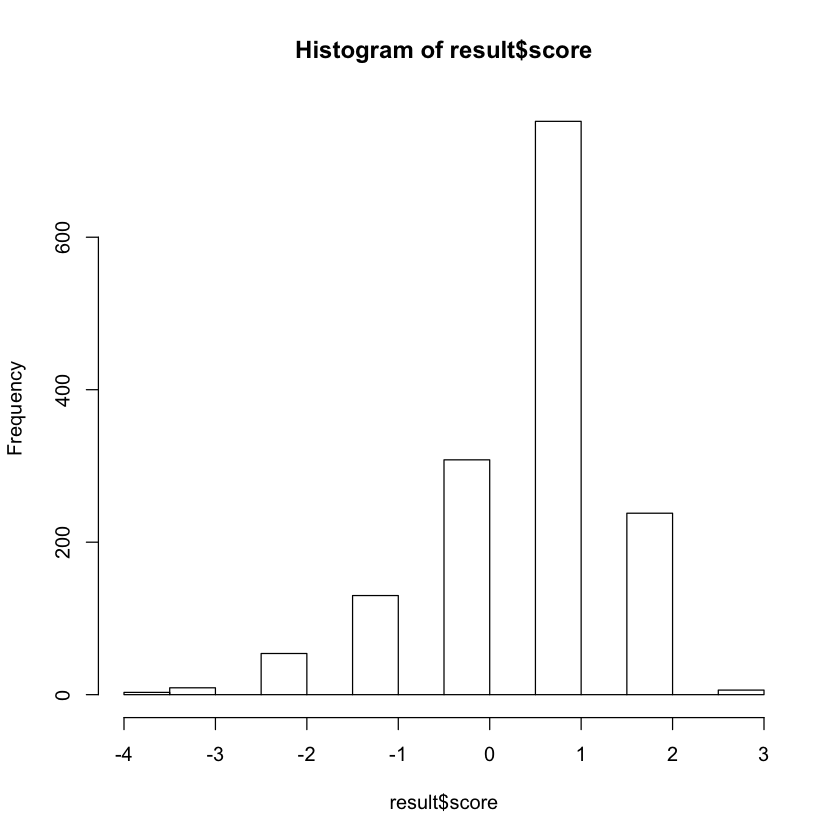

In [33]:
 hist(result$score)

In [34]:
terms<-Terms(dtm)

In [35]:
ap_td<-tidy(dtm)

In [36]:
#ap_sentiments <- ap_td %>%
  #inner_join(get_sentiments("bing"), by = c(term = "word"))
#ap_sentiments

In [37]:
#ap_sentiments %>%
  #count(sentiment,term, wt = count) %>%
  #ungroup() %>%
  #filter(n >= 1) %>%
  #mutate(n = ifelse(sentiment == "negative", -n, n)) %>%
  #mutate(term = reorder(term, n)) %>%
  #ggplot(aes(term, n, fill = sentiment)) +
  #geom_bar(stat = "identity") +
  #ylab("Contribution to sentiment") +
  #coord_flip()

In [38]:
#Number of topics code 


library(topicmodels)
library(ldatuning)

In [39]:
result <- FindTopicsNumber(
  n,
  topics = seq(from = 2, to = 10, by = 1),
   metrics = c("Griffiths2004", "CaoJuan2009", "Arun2010", "Deveaud2014"),
  method = "Gibbs",
   control = list(seed = 77),
  mc.cores = 2L,
  verbose = TRUE
 )

fit models... done.
calculate metrics:
  Griffiths2004... done.
  CaoJuan2009... done.
  Arun2010... done.
  Deveaud2014... done.


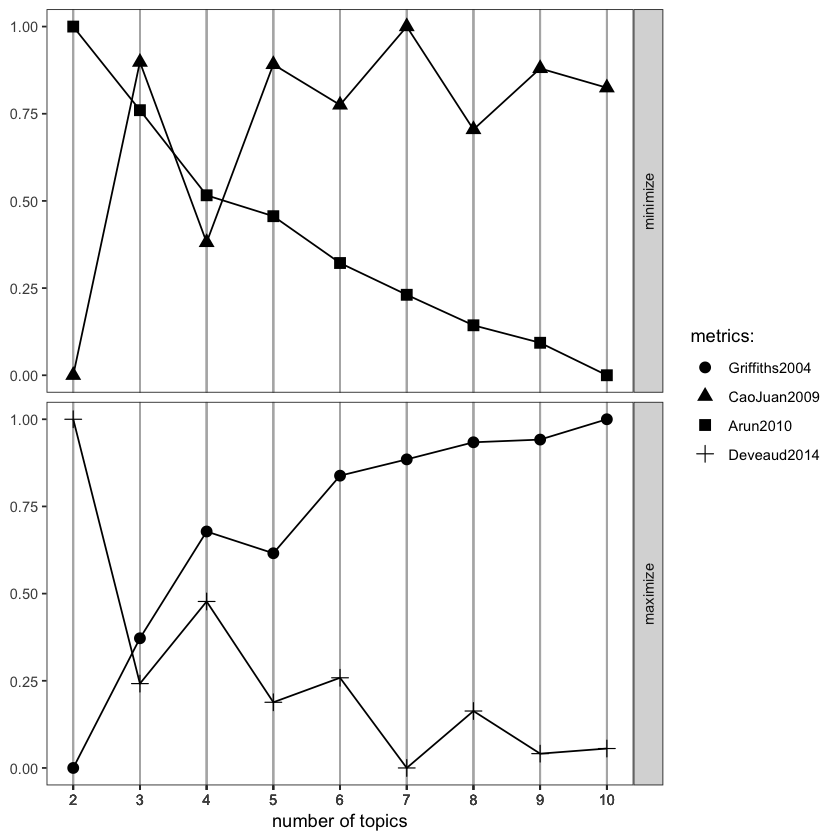

In [40]:
#Arun2010,Deveaud2014 maximize
#Griffiths2009, CaoJuan2009 minimize 


FindTopicsNumber_plot(result)

In [41]:
ap_lda <- LDA(n, k = 2, control = list(seed = 1234))

In [42]:

ap_topics <- tidy(ap_lda, matrix = "beta")

In [44]:
ap_top_terms <- ap_topics %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

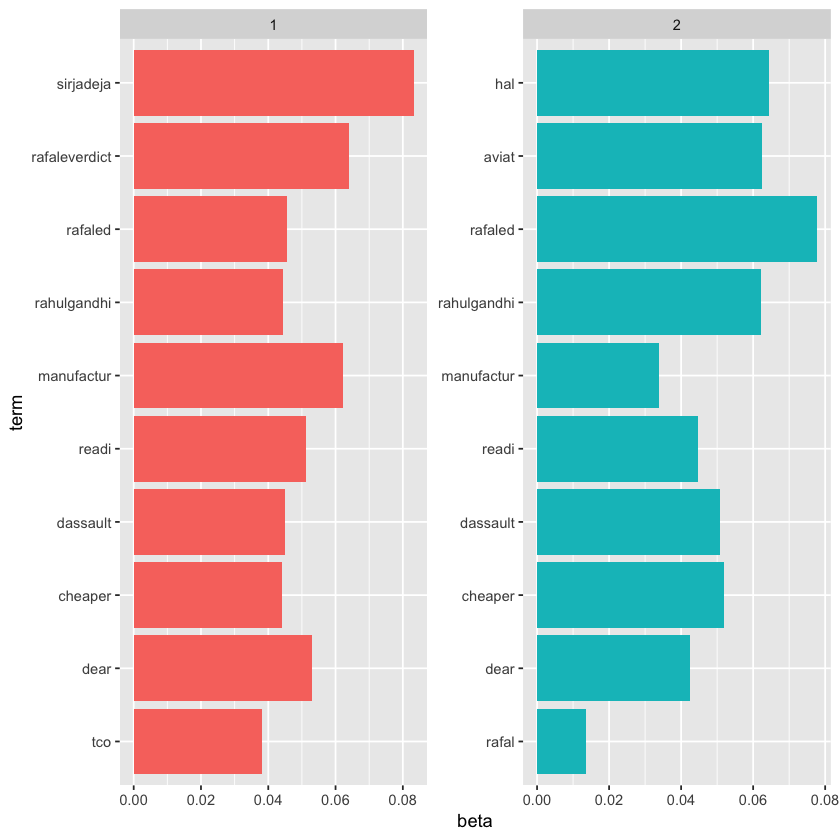

In [45]:
ap_top_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()